In [11]:
import yt
from pprint import pprint
import pandas as pd
import h5py
from matplotlib import pyplot as plt
import numpy as np
yt.enable_plugins()
ds = yt.load("DD0124/output_0124")

yt : [INFO     ] 2021-10-19 14:28:07,411 Loading plugins from /Users/akohler22/.config/yt/my_plugins.py
yt : [WARNING  ] 2021-10-19 14:28:07,415 Field ('gas', 'metallicity3') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021-10-19 14:28:07,416 Field ('gas', 'total_metallicity') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021-10-19 14:28:07,417 Field ('gas', 'electron_fraction') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021-10-19 14:28:07,420 Field ('gas', 'J21_LW') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021-10-19 14:28:07,421 Field ('gas', 'J_LW') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021-10-19 14:28:07,421 Field ('gas', 'J_Lyman') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021-10-19 14:28:07,422 Field ('gas', 'column_density') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2021

In [12]:
#ds.add_particle_filter('p2')
ds.add_particle_filter('p2')
ds.field_list
ds.derived_field_list

Parsing Hierarchy : 100%|██████████| 773/773 [00:00<00:00, 9341.62it/s]
yt : [INFO     ] 2021-10-19 14:28:10,735 Gathering a field list (this may take a moment.)


[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'pa

In [13]:
halos = yt.load("halos_DD0124/halos_DD0124.0.bin")
ad_halos = halos.all_data()
print(ad_halos['halos','particle_mass'])
#halo1_density = yt.ProjectionPlot(ds,"y",["density","temperature"],center=center1,width=radius1,weight_field="density")

yt : [INFO     ] 2021-10-19 14:28:29,909 Parameters: current_time              = 1.2789117712701602e+16 s
yt : [INFO     ] 2021-10-19 14:28:29,910 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-10-19 14:28:29,911 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-10-19 14:28:29,911 Parameters: domain_right_edge         = [0.67659998 0.67659998 0.67659998]
yt : [INFO     ] 2021-10-19 14:28:29,912 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-10-19 14:28:29,913 Parameters: current_redshift          = 11.200170907090154
yt : [INFO     ] 2021-10-19 14:28:29,914 Parameters: omega_lambda              = 0.6888999938964844
yt : [INFO     ] 2021-10-19 14:28:29,914 Parameters: omega_matter              = 0.3111000061035156
yt : [INFO     ] 2021-10-19 14:28:29,915 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-10-19 14:28:29,916 Parameters: hubble_constant           = 0.6765999794006348
yt : [INFO     ] 2021-10-19 1

[2.954600e+04 5.372000e+04 2.484560e+05 2.014500e+04 2.162241e+06
 2.283100e+04 4.311050e+05 3.041911e+06 2.672580e+05 9.871100e+05
 4.029000e+03 6.285270e+05 3.787280e+05 4.109980e+05 4.431900e+04
 5.237700e+04 1.839920e+05 2.686000e+03 2.793450e+05 7.655100e+04
 8.595200e+04] Msun/h


In [14]:
for i in range(len(ad_halos['halos','particle_position'])):
    if ad_halos['halos','particle_mass'][i] > 1e+06:
        #print(ad_halos['halos','particle_mass'][i])
        halo_position = ds.arr(ad_halos['halos', 'particle_position'][i].in_units('Mpccm/h').v, 'Mpccm/h')
        try:
            halo_radius = ds.arr(ad_halos['halos','virial_radius'][i].in_units('kpccm/h').v, 'kpccm/h')
#             halo_proj = yt.ProjectionPlot(ds,"y",["density","temperature","metallicity","metallicity3"],center=halo_position,width=halo_radius,weight_field="density")
        except:
            halo_radius = ad_halos['halos','virial_radius'][i]
#             halo_proj = yt.ProjectionPlot(ds,"y",["density","temperature","metallicity","metallicity3"],center=halo_position,width=halo_radius,weight_field="density")
        #halo_radius = ad_halos['halos','virial_radius'][i]
        #print(halo_radius)
        
        #halo_sph = ds.sphere(halo_position, halo_radius)
      
        print(i)
        print(ad_halos['halos','particle_mass'][i])
        #halo_proj.save('halo'+str(i)+".png")
#         halo_proj.show()

4
2162241.0 Msun/h
7
3041911.0 Msun/h


In [10]:
halo_dat = {}
#print(ds.field_list)
for i in range(len(ad_halos['halos','particle_position'])):
    if ad_halos['halos','particle_mass'][i] > 1e+06:
        
        halo_position = ds.arr(ad_halos['halos', 'particle_position'][i].in_units('Mpccm/h').v, 'Mpccm/h')
        halo_radius = ds.arr(ad_halos['halos','virial_radius'][i].in_units('kpccm/h').v, 'kpccm/h')
        halo_sph = ds.sphere(halo_position, halo_radius)
        
        time = ds.current_time
        
        halo_dat[i] = {'id':i, 'position':np.array(halo_position), 'radius':halo_radius, 'time':time, 'total mass':0, 'stellar mass':0, 'gas fraction':0, 'stellar mass':0, 'num pop 3 star particles':0, 'avg metallicity':0}
    
        halo_dat[i]['total mass'] = ad_halos['halos','particle_mass'][i].in_units('Msun')
        #print(halo_position)
        
        #print (ds.particle_types)
        #print (ds.particle_types_raw)
        #print (ds.particle_type_counts)
        
        num_pop3 = len(halo_sph[('p2','particle_mass')])
        halo_dat[i]['num pop 3 star particles'] = num_pop3
        
        mass_gas = halo_sph.quantities.total_quantity(['cell_mass']).in_units('Msun')
        mass_tot = halo_sph.quantities.total_quantity(['cell_mass'])+halo_sph.quantities.total_quantity(['particle_mass'])
        mass_stellar = halo_sph.quantities.total_quantity(('p2','particle_mass'))
        
        halo_dat[i]['stellar mass'] = mass_stellar.in_units('Msun')
        halo_dat[i]['gas fraction'] = mass_gas/halo_dat[i]['total mass']
        
        avg_metallicity = halo_sph.quantities.weighted_average_quantity("metallicity","density")
        halo_dat[i]['avg metallicity'] = avg_metallicity
        
        #spin_parameter1 = halo_sph.quantities.spin_parameter()
        #spin_parameter2 = halo_sph.quantities.spin_parameter().in_units('dimensionless')
        #spin_parameter = halo_sph.quantities.weighted_average_quantity("spin_parameter", "density")
        #halo_dat[i]['spin parameter1'] = spin_parameter1
        #halo_dat[i]['spin parameter2'] = spin_parameter2
        #print(halo_sph["metallicity_fraction"])
        
pprint(halo_dat)

{4: {'avg metallicity': unyt_quantity(6.2076121e-20, '(dimensionless)'),
     'gas fraction': unyt_quantity(0.11249047, '(dimensionless)'),
     'id': 4,
     'num pop 3 star particles': 0,
     'position': array([0.28006047, 0.34090042, 0.24725612]),
     'radius': unyt_array(3.29468346, 'kpccm/h'),
     'stellar mass': unyt_quantity(0., 'Msun'),
     'time': unyt_quantity(75.89987395, 'code_time'),
     'total mass': unyt_quantity(3398208.79397124, 'Msun')},
 7: {'avg metallicity': unyt_quantity(6.30405136e-20, '(dimensionless)'),
     'gas fraction': unyt_quantity(0.07761279, '(dimensionless)'),
     'id': 7,
     'num pop 3 star particles': 0,
     'position': array([0.2711159 , 0.26456627, 0.22912116]),
     'radius': unyt_array(3.25639248, 'kpccm/h'),
     'stellar mass': unyt_quantity(0., 'Msun'),
     'time': unyt_quantity(75.89987395, 'code_time'),
     'total mass': unyt_quantity(4511757.45335403, 'Msun')},
 31: {'avg metallicity': unyt_quantity(6.03154384e-20, '(dimensionles

In [ ]:
halo_dat = pd.DataFrame.from_dict(halo_dat).transpose()
print(halo_dat)

Text(0, 0.5, '# pop3 star particles')

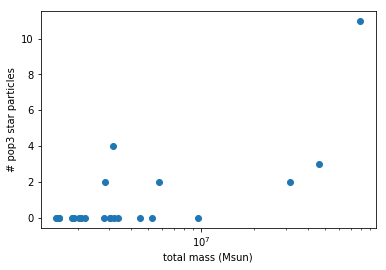

In [6]:
plt.scatter(halo_dat['total mass'], halo_dat['num pop 3 star particles'])
plt.xscale('log')
plt.xlabel('total mass (Msun)')
plt.ylabel('# pop3 star particles')

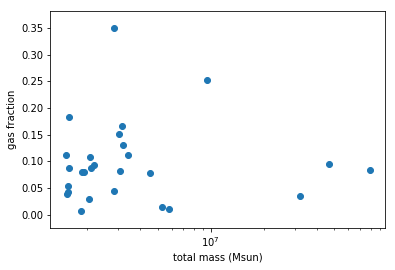

In [7]:
plt.scatter(halo_dat['total mass'], halo_dat['gas fraction'])
plt.xlabel('total mass (Msun)')
plt.ylabel('gas fraction')
plt.xscale('log')

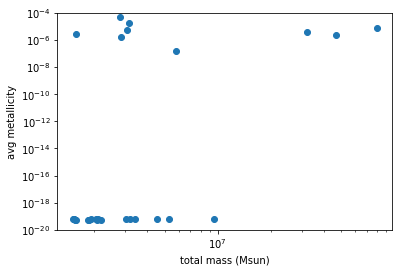

In [8]:
plt.scatter(halo_dat['total mass'], halo_dat['avg metallicity'])
plt.xlabel('total mass (Msun)')
plt.ylabel('avg metallicity')
plt.yscale('log')
plt.ylim(1e-20,1e-4)
plt.xscale('log')

In [9]:
plt.scatter(halo_dat['total mass'], halo_dat['spin parameter'])
plt.xscale('log')
plt.xlabel('total mass (Msun)')
plt.ylabel('spin parameter')

KeyError: 'spin parameter'

Text(0, 0.5, 'stellar mass')

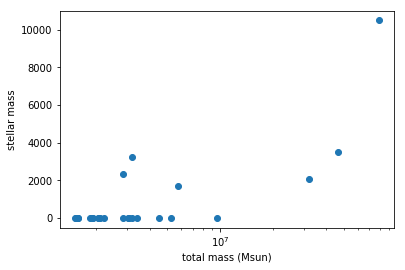

In [10]:
plt.scatter(halo_dat['total mass'], halo_dat['stellar mass'])
plt.xscale('log')
plt.xlabel('total mass (Msun)')
plt.ylabel('stellar mass')

In [40]:
positions = []
for pos in halo_dat['position']:
    positions.append(np.array(pos))
with h5py.File("output_test.hdf5","w") as f:
    h_id = f.create_dataset("id", data=halo_dat['id'],dtype='i')
    
    h_pos = f.create_dataset("position", data=positions, dtype='f')
    h_pos.attrs['units'] = "Mpccm/h"
    
    h_t = f.create_dataset("time", data=halo_dat['time'], dtype='f')
    h_t.attrs['units'] = "code_time"
    
    h_r = f.create_dataset("radius", data=halo_dat['radius'], dtype='f')
    h_r.attrs['units'] = "kpccm/h"
    
    h_gf = f.create_dataset("gas_fraction", data=halo_dat['gas fraction'], dtype='f')
    h_gf.attrs['units'] = "dimensionless"
    
    h_z = f.create_dataset("avg_metallicity", data=halo_dat['avg metallicity'], dtype='f')
    h_z.attrs['units'] = "dimensionless"
    
    h_pop3 = f.create_dataset("num_pop3", data=halo_dat['num pop 3 star particles'], dtype='i')
    
    #h_spin = f.create_dataset("spin_parameter", data=halo_dat['spin parameter'], dtype='f')
    #h_spin.attrs['units'] = "dimensionless"
    
    h_ms = f.create_dataset("stellar_mass", data=halo_dat['stellar mass'], dtype='f')
    h_ms.attrs['units'] = "Msun"
    
    h_mt = f.create_dataset("total_mass", data=halo_dat['total mass'], dtype='f')
    h_mt.attrs['units'] = "Msun"
    
f.close()

KeyError: 'position'

In [12]:
print(halo_dat["gas fraction"])

4        0.11249047285911215 dimensionless
7        0.07761279299146534 dimensionless
31       0.08075093890429334 dimensionless
37        0.2530254214112707 dimensionless
47       0.08068126324967446 dimensionless
65       0.18340852139490615 dimensionless
82       0.01111181548372197 dimensionless
92       0.04432164524104986 dimensionless
97       0.08411690061148261 dimensionless
99       0.35046774089378546 dimensionless
101      0.16563185021093255 dimensionless
102       0.0817698380813252 dimensionless
103      0.08818805668302364 dimensionless
107      0.09496284239134462 dimensionless
130      0.13073151145254366 dimensionless
138     0.014130279173229756 dimensionless
141     0.028560261291196126 dimensionless
142      0.04172329779462113 dimensionless
144     0.039213055093103764 dimensionless
166    0.0071324847831600625 dimensionless
171      0.15144658032454789 dimensionless
173      0.05396150169202659 dimensionless
177      0.09322859992753091 dimensionless
190      0.

In [13]:
with h5py.File("output_test.hdf5",'r') as f:
    print(f.get('gas_fraction')[0])
    print(f.get('position')[0])

0.112490475
[0.28006047 0.34090042 0.24725612]
